In [65]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [66]:
a = 3
b = 3
z = a + b*1j
print('z =', z6)
print('The type of the variable is', type(z))

z = (3+3j)
The type of the variable is <class 'complex'>


In [67]:
z1 = 2.75 + 3.69j
z2 = 8.55 - 6.13j
z3 = z1 * z2
print('z3 =', z3)

z3 = (46.1322+14.692000000000004j)


In [68]:
z4 = 1.4 * numpy.exp(5.32*1j)

print('z4 = ', z4)

z4 =  (0.799270785858-1.1494199454j)


In [69]:
z5 = (7.51-9.15j)/(4.43+9.64j)
print('z5 = ', z5)

z5 =  (-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski transformation

In [70]:
N = 200
R = 1.5
theta = numpy.linspace(0, 2*math.pi, N)
x = R*numpy.cos(theta)
y = R*numpy.sin(theta)

In [71]:
def get_E(x, y):
    z = x + y*1j
    E = z + c**2/z
    
    return E

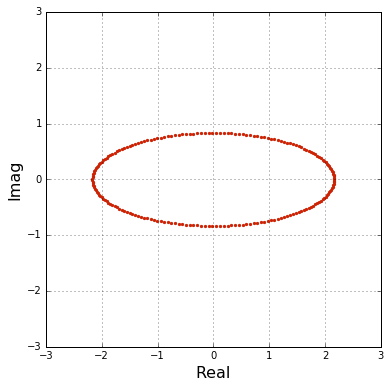

In [72]:
# 2.1
c = 1
R = 1.5
x_c, y_c = 0.0, 0.0
E_1 = get_E(x, y)
pyplot.figure(figsize=(6, 6))
pyplot.grid(True)
pyplot.xlabel('Real', fontsize=16)
pyplot.ylabel('Imag', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.scatter(E_1.real, E_1.imag, color='#CD2305', s=5, marker='o')

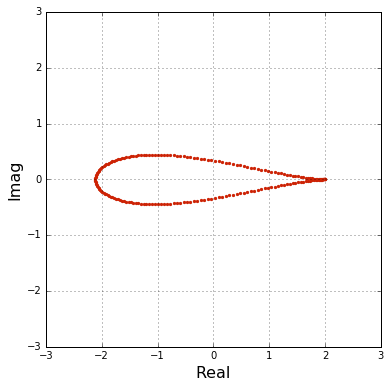

In [73]:
# 2.2
c = 1
R_2 = 1.2
x_2 = R_2*numpy.cos(theta)+(c-R_2)
y_2 = R_2*numpy.sin(theta)
E_2 = get_E(x_2, y_2)
pyplot.figure(figsize=(6, 6))
pyplot.grid(True)
pyplot.xlabel('Real', fontsize=16)
pyplot.ylabel('Imag', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.scatter(E_2.real, E_2.imag, color='#CD2305', s=5, marker='o')

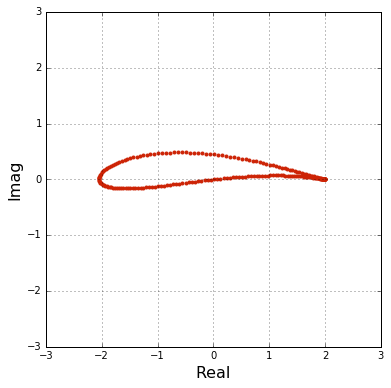

In [74]:
# 2.3
c = 1
deta_x, deta_y = 0.1, 0.1
R_3 = ((c-deta_x)**2 + deta_y**2)**0.5
x_3 = R_3*numpy.cos(theta)+deta_x
y_3 = R_3*numpy.sin(theta)+deta_y
E_3 = get_E(x_3, y_3)
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('Real', fontsize=16)
pyplot.ylabel('Imag', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.scatter(E_3.real, E_3.imag, color='#CD2305', s=9, marker='o')

## 3. Grid points on the $z$-plane using polar coordinates

In [75]:
N_r = 100
N_theta = 145
c = 1
R = 1.15
x_c, y_c = -0.15, 0.0
r = numpy.linspace(R, 5, N_r)
theta = numpy.linspace(0, 2*math.pi, N_theta)
R_r, T_theta = numpy.meshgrid(r, theta)
z_x = R_r*numpy.cos(T_theta)+x_c
z_y = R_r*numpy.sin(T_theta)+y_c

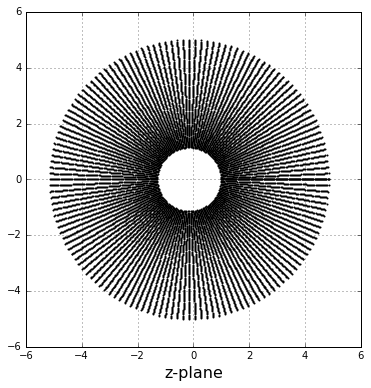

In [76]:
# plot a grid on the z-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-6.0, 6.0)
pyplot.scatter(z_x, z_y , color='k', s=4, marker='o', linewidth=0)

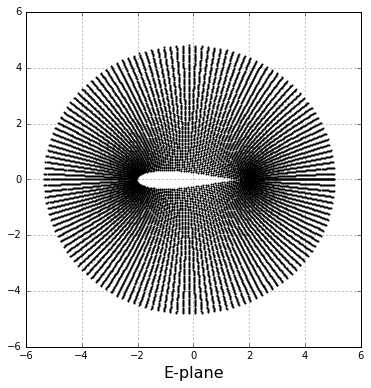

In [77]:
E_4 = get_E(z_x, z_y)
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('E-plane', fontsize=16)
pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-6.0, 6.0)
pyplot.scatter(E_4.real, E_4.imag, color='k', s=4, marker='o', linewidth=0)

## 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

In [83]:
u_inf = 1.0
R = 1.15
kappa = (R**2)*2*math.pi*u_inf
print('kappa=', kappa)

kappa= 8.309512568745001


In [84]:
def get_velocity_doublet(strength, xd, yd, X, Y):

    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):

    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [85]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_c, y_c, z_x, z_y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_c, y_c, z_x, z_y)

In [165]:
u_freestream = u_inf * numpy.ones((N_theta, N_r), dtype=float)
v_freestream = numpy.zeros((N_theta, N_r), dtype=float)

psi_freestream = u_inf * z_y

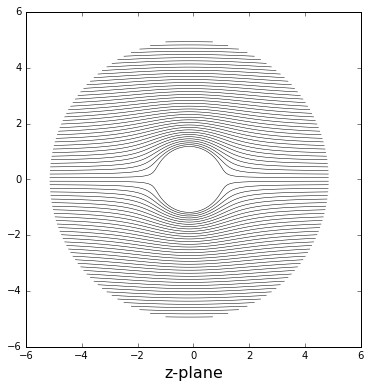

In [166]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(z_x, z_y, psi, levels=numpy.linspace(-6, 6, 100), colors='k', linewidths=0.5, linestyles='solid')


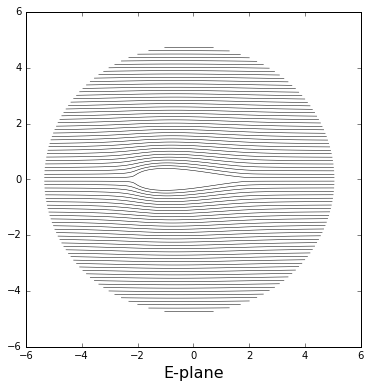

In [107]:
E_5 = get_E(z_x, z_y)
# plot the streamlines
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlabel('E-plane', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(E_5.real, E_5.imag, psi, levels=numpy.linspace(-6, 6, 100), colors='k', linewidths=0.5, linestyles='solid')


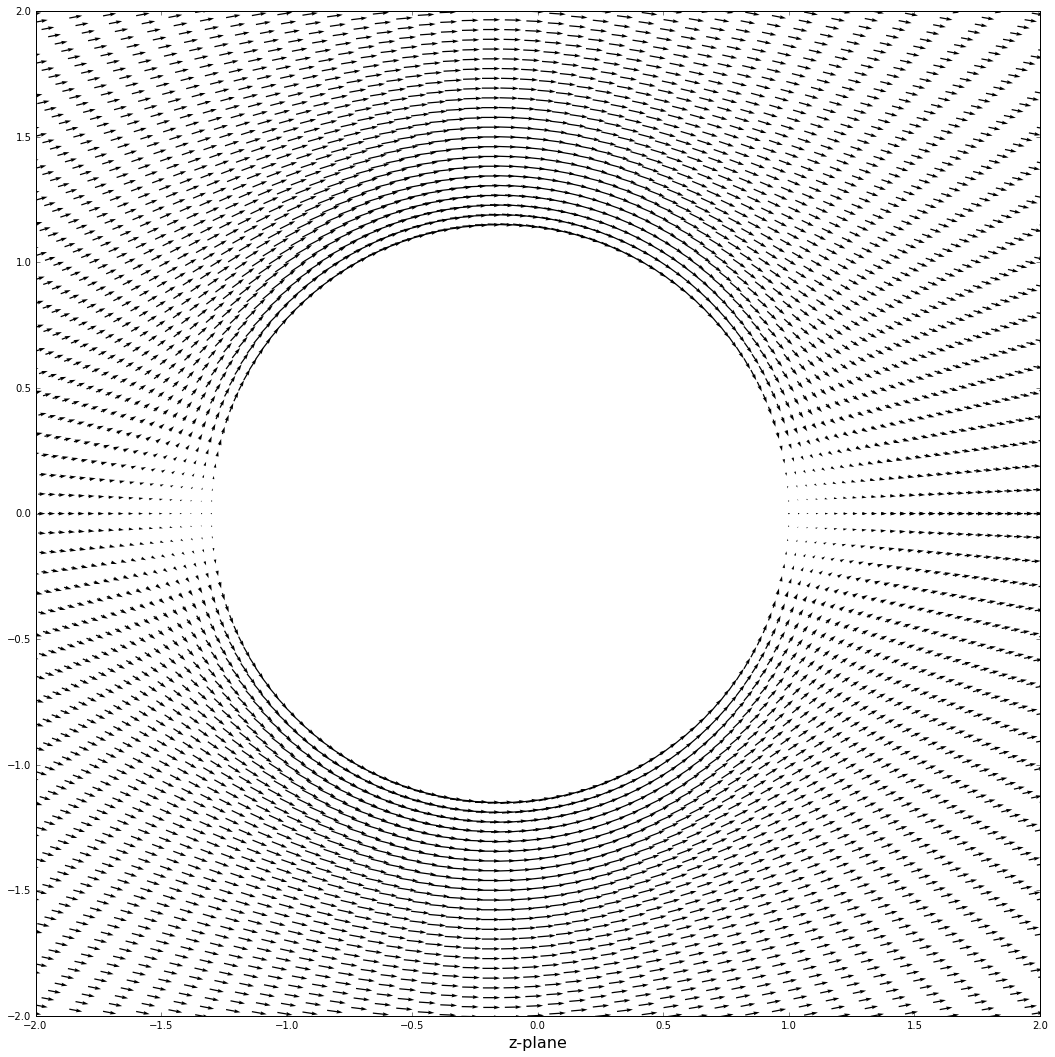

In [139]:
z = z_x + z_y * 1j
W_E = (u - v * 1j)/(1-(c/z)**2)
size = 18
pyplot.figure(figsize=(size, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-2.0, 2.0)
pyplot.ylim(-2.0, 2.0)
pyplot.quiver(z_x, z_y, u, v, units='xy',pivot='tip',width=0.005,scale=20)

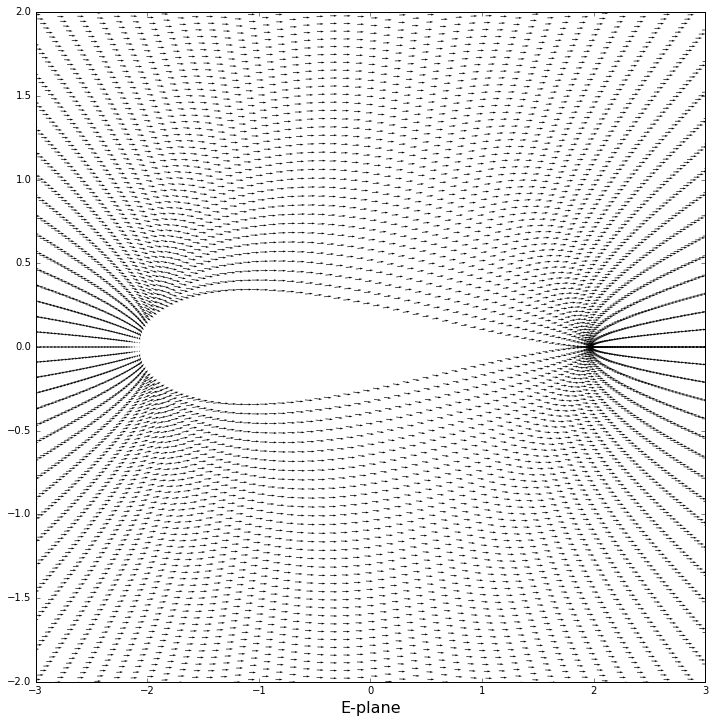

In [176]:
size = 12
pyplot.figure(figsize=(size, size))
pyplot.xlabel('E-plane', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-2.0, 2.0)
pyplot.quiver(E_5.real, E_5.imag, W_E.real, W_E.imag, units='xy',pivot='tip',width=0.005,scale=20)

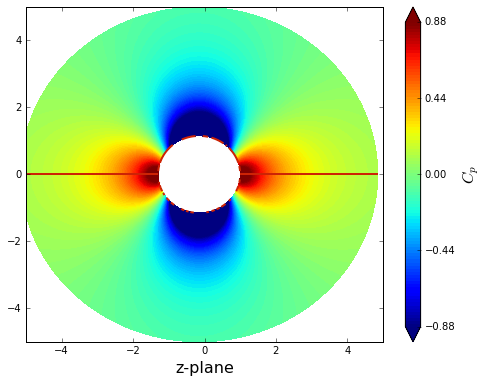

In [155]:
# compute the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field in the z-plane
size = 6
pyplot.figure(figsize=(8, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(z_x, z_y, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.44, 0.0, 0.44, 0.88])
pyplot.contour(z_x, z_y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')

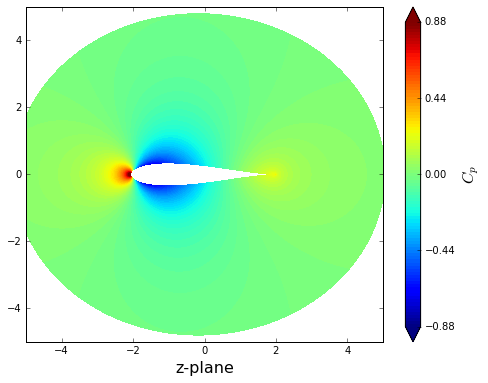

In [161]:
cp = 1.0 - (W_E.real**2 + W_E.imag**2)/u_inf**2

# plot the pressure coefficient field in the E-plane
size = 6
pyplot.figure(figsize=(8, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(E_5.real, E_5.imag, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.44, 0.0, 0.44, 0.88])

In [162]:
# Exercise 2

W_E.real[61, 0]

1.1063384662852436

In [163]:
-W_E.imag[61, 0]

0.52363334929849692

In [164]:
# Exercise 3

numpy.min(cp)

-0.68775567409240423

## 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [242]:
x_c, y_c = -0.15, 0.0
AoA = 20 * math.pi/180
x_pi = (z_x-x_c)*numpy.cos(AoA) + (z_y-y_c)*numpy.sin(AoA)
y_pi = -(z_x-x_c)*numpy.sin(AoA) + (z_y-y_c)*numpy.cos(AoA)

In [243]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, 0, 0, x_pi, y_pi)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, 0, 0, x_pi, y_pi)

In [244]:
u_freestream = u_inf * numpy.ones((N_theta, N_r), dtype=float)
v_freestream = numpy.zeros((N_theta, N_r), dtype=float)
psi_freestream = u_inf * y_pi

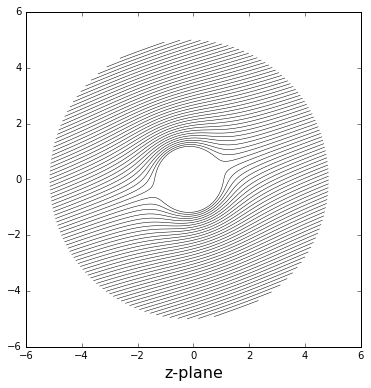

In [245]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet
u_1 = u * numpy.cos(AoA) - v * numpy.sin(AoA)
v_1 = u * numpy.sin(AoA) + v * numpy.cos(AoA)
# plot the streamlines in the z-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(z_x, z_y, psi, levels=numpy.linspace(-6, 6, 100), colors='k', linewidths=0.5, linestyles='solid')


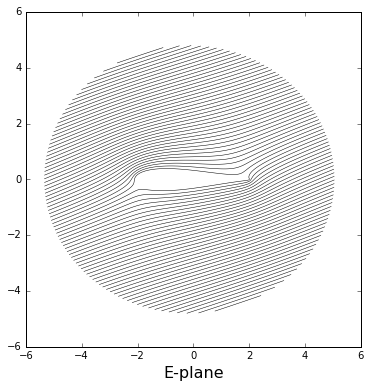

In [246]:
E_5 = get_E(z_x, z_y)
# plot the streamlines in the E-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlabel('E-plane', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(E_5.real, E_5.imag, psi, levels=numpy.linspace(-6, 6, 100), colors='k', linewidths=0.5, linestyles='solid')


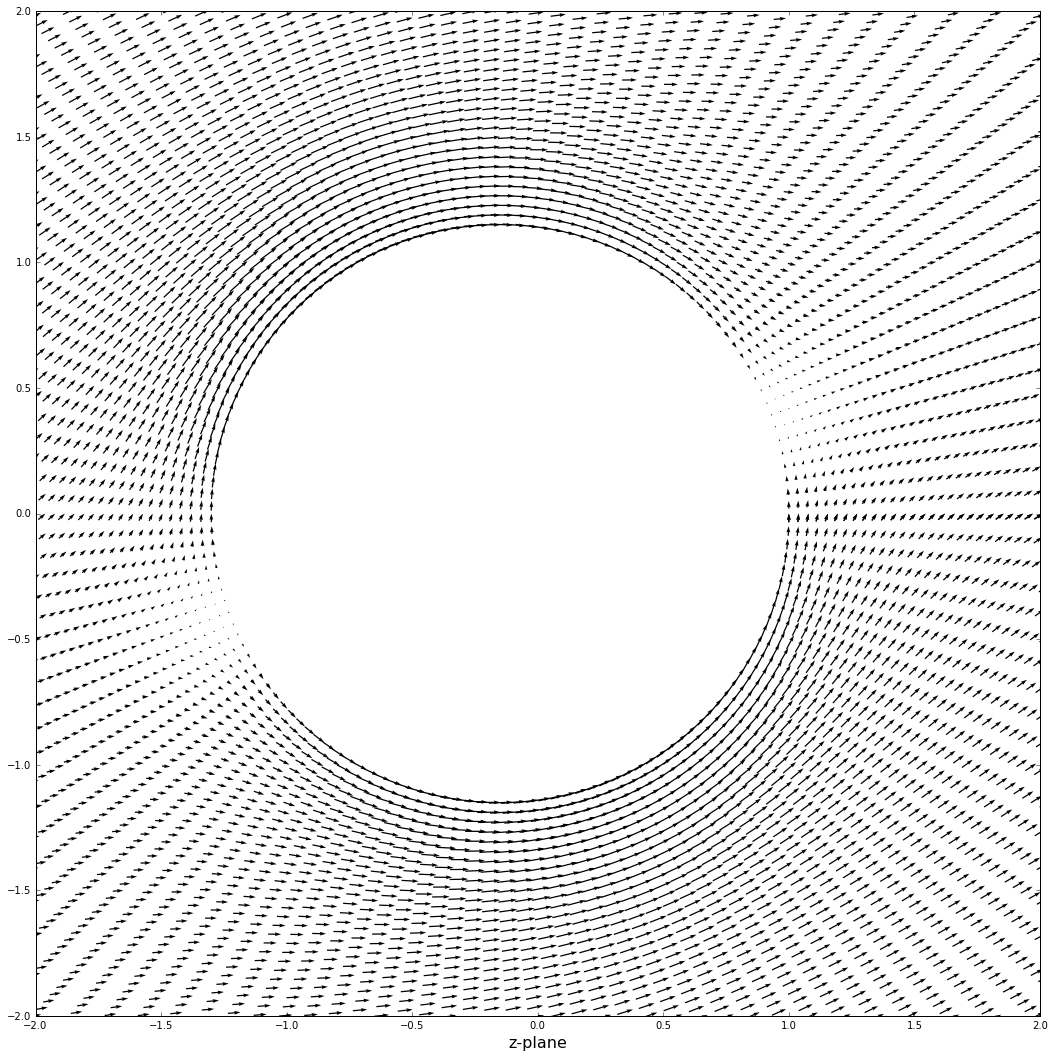

In [247]:
# plot the velocity in the z-plane
size = 18
pyplot.figure(figsize=(size, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-2.0, 2.0)
pyplot.ylim(-2.0, 2.0)
pyplot.quiver(z_x, z_y, u_1, v_1, units='xy',pivot='tip',width=0.005,scale=20)

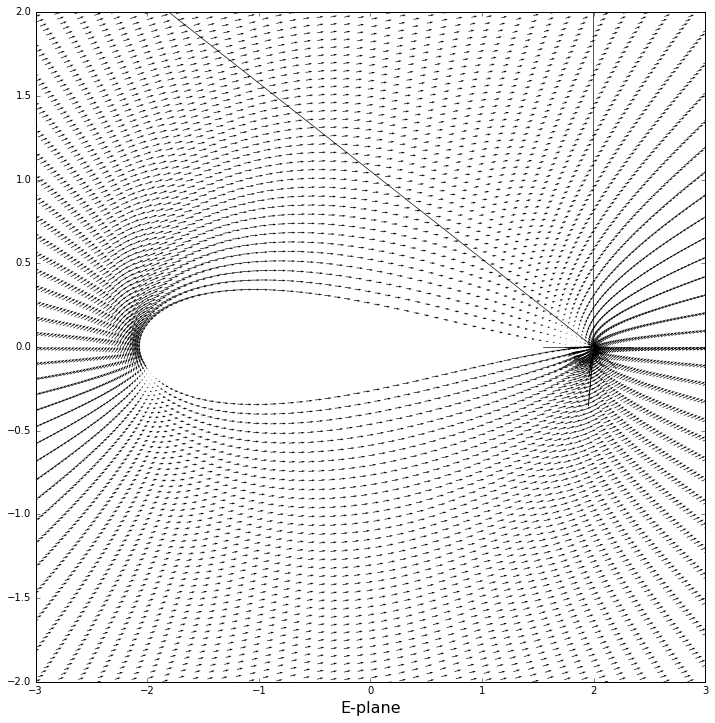

In [248]:
# plot the velocity in the E-plane
W = (u_1 - v_1*1j)/(1-(c/z)**2)
size = 12
pyplot.figure(figsize=(size, size))
pyplot.xlabel('E-plane', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-2.0, 2.0)
pyplot.quiver(E_5.real, E_5.imag, W.real, -W.imag, units='xy',pivot='tip',width=0.005,scale=20)

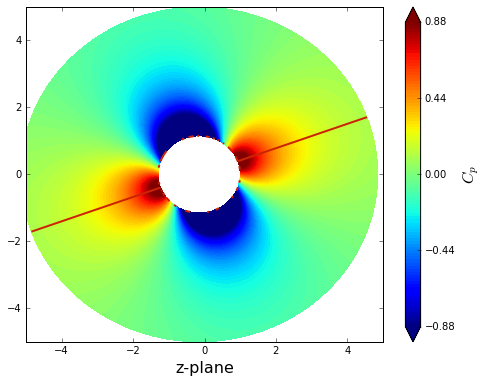

In [268]:
# compute the pressure coefficient field
cp = 1.0 - (u_1**2+v_1**2)/u_inf**2

# plot the pressure coefficient field in the z-plane
size = 6
pyplot.figure(figsize=(8, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(z_x, z_y, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.44, 0.0, 0.44, 0.88])
pyplot.contour(z_x, z_y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')

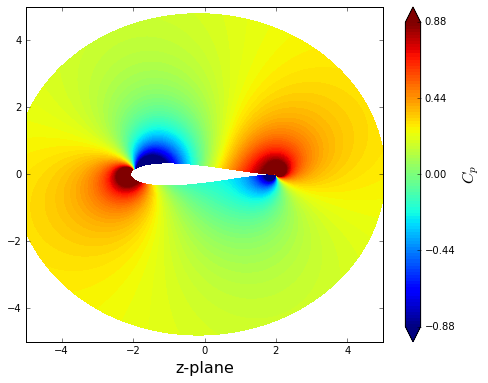

In [269]:
# compute the pressure coefficient field
cp = 1.0 - (W.real**2 - W.imag**2)/u_inf**2

# plot the pressure coefficient field in the E-plane
size = 6
pyplot.figure(figsize=(8, size))
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(E_5.real, E_5.imag, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.44, 0.0, 0.44, 0.88])

In [264]:
W.real[49, 0]

1.4830654150147842

In [265]:
-W.imag[49, 0]

0.092075495007287816

In [266]:
u_1[49, 0]

1.6467994019724563

In [267]:
cp_2[74, 0]

0.73205080756887697